<a href="https://colab.research.google.com/github/RaulMedeiros/Seattle_Incidents_Report/blob/master/ML_Seattle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aprendizagem de Máquina

Esta parte da prova avalia a sua familiaridade com o processo de criação de um modelo estatístico.
Argumente bem em cada uma das fases, desde a etapa de tratamento dos dados até a validação dos
resultados.

5. A liderança do Departamento de Polícia de Seattle manifestou o interesse em uma aplicação que classifica
os incidentes em "Level 1" ou "Level 2" com base em outras colunas da tabela e lhe requisitou um parecer
sobre esta proposta. Embasando-se nos dados, enumere fatores que fomentem a criação deste classificador e
sugira um modelo estatístico para executar esta tarefa. Indique a métrica mais adequada para avaliá-lo -
justificando a sua escolha - e enuncie a sua estratégia para lidar com underfit e overfit. Sua resposta deve
contemplar a explanação teórica de pelo menos 3 modelos que você julgar como sendo os mais adequados.

6. Implemente o pipeline planejado na questão 5.

7. Quando os incidentes são reportados, eles vão para uma lista que será avaliada por um inspetor cujo
papel é classificá-los como "Level 1" ou "Level 2", que normalmente é um procedimento demorado. Além
disso, há o interesse por parte da direção do Departamento de Polícia de Seattle que os incidentes "Level 2"
sejam reportados com maior antecedência. Portanto, seu papel é ordenar as listas de incidentes de modo
que o inspetor se depare primeiro com eles. Utilize como métrica de validação a área abaixo da curva ROC
e se esforce ao máximo para alcançar a maior pontuação possível na validação cruzada. Há rumores de que é
possível alcançar pontuações acima de 0.85.

### Para adequar os dados a um processo de classificação os seguintes preprocessamentos foram implementados:

* **Remoção de instancias com valores não numéricos (Nan-values ou '-')**
* **Transformção dos dados da coluna Incident_Type para valores binarios.**
* **Transformação das features categoricas usando one-hot-encoding.**
* **Elaboração de novas caracteristicas como: em que dia da semana o incidente ocorreu, coeficiente de incidentes nivel 2 do civil autuado e coeficiente de incidentes nivel 2 do policial que atendeu a ocorrencia**
* **Decomposição da coluna 'Occured_date_time' em seus sub-campos: 'month', 'day'**
* **Remoção de colunas que não apresentam correlação com o problema como: 'ID',  'Incident_Num', 'Subject_ID', 'Officer_ID' **

### **Com o objetivo de selecionar o melhor preditor para o problema em questão algumas familias de algoritimos de aprendizado de maquina foram exploradas, dentre eles: **

* **Multinomial Naive Bayes (Bayes)**
* **Multilayer Perceptron (MLP)**
* **K Nearest Neighbor (KNN)**
* **Random Forest**
* **SVM - com kernel Linear (SVM-Linear)**
* **SVM - com kernel RBF (SVM-RBF)**

### Para detectar potenciais overfit e fazer a seleção dos hiperparametros dos classificadores foram utilizados um Hold-out (80/20) e uma 10-fold Cross Validation (nos 80%)

### Métrica de Avaliação:
* **Dado que este é um problema binario e representado por um dataset desbalanceado a melhor métrica para avaliar o desempenho dos modelos é a '*Area under the Receiver Operational Characteristic Curve (AUC ROC)'* **

* **Um problema com estas mesmas caracteristicas foi tema do estudo realizado em minha dissertação.** 
>* [Dissertação (Beta)](https://drive.google.com/file/d/1k7f4T6tHZGs4MLnpit1E085b5Pn949LT/view?usp=sharing)
>* [Slides de Apresentação](https://docs.google.com/presentation/d/14EYMM4m-PFqYlD22kBV4yp7_0cQ-0G0q9ciJqO3K7No/edit?usp=sharing)

# Environment configuration

In [0]:
## To update Seaborn default version please execute this code. 
## The Notebook will automatically restart.
## Please execult this script block only once!
!pip install -q seaborn --upgrade
import os
import signal
os.kill(os.getpid(), signal.SIGKILL)

# Import & Clean Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving use-of-force.csv to use-of-force.csv


In [21]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import itertools
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)
sns.set_style("darkgrid")
log =True

import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')
warnings.filterwarnings('ignore', 'Precision is ill-defined*')

0.9.0


In [22]:
# Load Data
df_src = pd.read_csv("use-of-force.csv")

# Remove Rows with Nan Values
print('Revove rows with Nan Values')
print('Before:',len(df_src),'samples')
df_src = df_src.dropna()
print('After:',len(df_src),'samples \n')
   
## Revove duplicates
print('Revove duplicates rows')
print('Before:',len(df_src),'samples')
df_src.drop_duplicates()
print('After:',len(df_src),'samples \n')

# Format TIME columns
df_src['Occured_date_time'] = pd.to_datetime(df_src['Occured_date_time'],
                                             format='%Y-%m-%d %H:%M:%S')
# # Create column hours
# df_src['month'] = df_src['Occured_date_time'].dt.month
# # Create column hours
# df_src['hour'] = df_src['Occured_date_time'].dt.hour
# Add weekdays (intergers) as a column
df_src['weekday_id'] = df_src['Occured_date_time'].dt.weekday

## Add holydays 
# from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
# cal = calendar()
# dr = df_src['Occured_date_time']
# holidays = cal.holidays(start=dr.min(), end=dr.max())
# df_src['holiday'] = df_src['Occured_date_time'].dt.date.astype('datetime64')\
#                                                  .isin(holidays)\
#                                                  .astype('category').cat.codes

# Transform category col to Int values
df_src['Incident_Type'] = df_src['Incident_Type'].astype('category').cat.codes
df_src.head(3)

Revove rows with Nan Values
Before: 8061 samples
After: 6242 samples 

Revove duplicates rows
Before: 6242 samples
After: 6242 samples 



,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender,weekday_id
17,11865-1741-4871,11865,0,2016-07-19 06:40:00,E,E,E1,1741,4871,Black or African American,Male,1
18,11898-1840-9082,11898,0,2016-07-21 16:12:00,E,C,C2,1840,9082,White,Female,3
20,10710-1065-2989,10710,1,2016-05-01 19:30:00,W,K,K1,1065,2989,White,Male,6


In [23]:
def recidivism_coef(df_src,col,title1,title2,title3):
  # Compute Recidivism by Subject
  df = df_src[[col,'Incident_Type']]
  df = df.groupby(by = [col], as_index = False).agg('count')
  df.columns = [col, title1]

  # Level 2 Incidents
  df_level2 = df_src[df_src['Incident_Type'] == 1]
  df_level2 = df_level2[[col,'Incident_Type']]
  df2 = df_level2.groupby(by = [col],as_index = False).agg('count')
  df2.columns = [col, title2]
  res = pd.merge(df2,df,on=col)
  res[title3] = res[title2]/res[title1]
  return res
  
# Compute Recidivism by Subject  
rec_subj = recidivism_coef(df_src,
           col='Subject_ID',
           title1='Subject Total Incidents',
           title2='Subject Incidents Level 2',
           title3='rec_subj')
df = pd.merge(df_src,rec_subj[['Subject_ID','rec_subj']],on='Subject_ID')

# Compute Recidivism by Officer
rec_officer = recidivism_coef(df,
              col='Officer_ID',
              title1='Officer Total Incidents Involved',
              title2='Officer Level 2 Involved',
              title3='rec_officer')
df = pd.merge(df,rec_officer[['Officer_ID','rec_officer']],on='Officer_ID')

df.head()

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender,weekday_id,rec_subj,rec_officer
0,11865-1741-4871,11865,0,2016-07-19 06:40:00,E,E,E1,1741,4871,Black or African American,Male,1,0.50,0.333333
1,4003-1741-3287,4003,1,2015-02-08 11:10:00,E,G,G3,1741,3287,Black or African American,Male,6,1.00,0.333333
2,2551-1741-2289,2551,0,2014-11-21 07:44:00,E,E,E1,1741,2289,White,Male,4,0.25,0.333333
3,5915-913-4871,5915,1,2015-07-03 17:16:00,E,G,G2,913,4871,Black or African American,Male,4,0.50,1.000000
4,1099-913-1095,1099,1,2014-06-05 21:45:00,S,S,S1,913,1095,Asian,Male,3,1.00,1.000000


In [24]:
# Remove columns
df = df.drop(['ID',
              'Incident_Num',
              'Occured_date_time',
              'Subject_ID',
              'Officer_ID',
             ], axis=1)

if(log): display(df.head(3))

,Incident_Type,Precinct,Sector,Beat,Subject_Race,Subject_Gender,weekday_id,rec_subj,rec_officer
0,0,E,E,E1,Black or African American,Male,1,0.50,0.333333
1,1,E,G,G3,Black or African American,Male,6,1.00,0.333333
2,0,E,E,E1,White,Male,4,0.25,0.333333


### Features to One-Hot-Encoding

In [25]:
columns = [ 'Subject_Race',
            'Subject_Gender',
            'Sector',
            'Precinct',
            'Beat',
#             'month',
            'weekday_id',
          ]
df = pd.get_dummies(data=df, columns=columns)
if(log): display(df.head(3))

,Incident_Type,rec_subj,rec_officer,Subject_Race_American Indian/Alaska Native,Subject_Race_Asian,Subject_Race_Black or African American,Subject_Race_Hispanic or Latino,Subject_Race_Nat Hawaiian/Oth Pac Islander,Subject_Race_White,Subject_Gender_Female,...,Beat_W2,Beat_W3,Beat_XX,weekday_id_0,weekday_id_1,weekday_id_2,weekday_id_3,weekday_id_4,weekday_id_5,weekday_id_6
0,0,0.50,0.333333,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1.00,0.333333,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.25,0.333333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
# Set DATA 
features = df.drop(['Incident_Type'],axis=1)
labels = df['Incident_Type']
num_features = len(features.columns)

## PCA

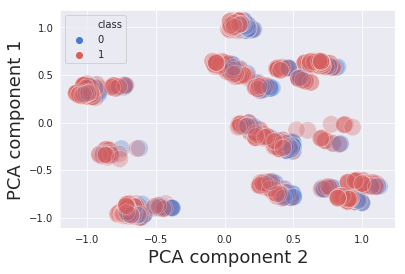

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Palette configurations
deep_pal = sns.color_palette('muted')
pal = sns.blend_palette([deep_pal[0], deep_pal[3]],2)

#Compute PCA
pca = PCA(n_components=2)
pca.fit(features)
T = pca.transform(features) # transformed data
df_pca = pd.DataFrame(T)
df_pca.columns = ['PCA component 1', 'PCA component 2']
df_pca['class'] = labels

# Plot the components
sns.scatterplot(x='PCA component 2',
                y='PCA component 1',
                data = df_pca,
                hue='class',
                s=300,
                palette=pal,
                alpha=0.3,
               )
plt.ylabel('PCA component 1', fontsize=18)
plt.xlabel('PCA component 2', fontsize=18)

plt.show()

# SKlean Classification FrameWork

In [0]:
from sklearn.model_selection import cross_validate , train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
import os

from sklearn.externals import joblib

from scipy.stats import randint as sp_randint
from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import RandomizedSearchCV

class_weight = {0: 10, 1: 1}

# KFOLD 
cv = 10

# Classifieres
clf_list = np.array([  
            MultinomialNB(),        
            MLPClassifier(max_iter=1000,solver='adam',
                          learning_rate_init=5e-04,tol=1e-3),      
            KNeighborsClassifier(n_jobs=1),   
            RandomForestClassifier(class_weight=class_weight,n_jobs=1),
            svm.SVC(kernel='linear',class_weight=class_weight,
                    probability=True,max_iter=4000,tol=1e-3),
            svm.SVC(kernel='poly',class_weight=class_weight,
                    probability=True,max_iter=4000,tol=1e-3),
            svm.SVC(kernel='rbf',class_weight=class_weight,
                    probability=True,max_iter=4000,tol=1e-3)
           ])

# specify parameters and distributions to sample from
param_dist_list = np.array([ 
                    #Bayes
                    None, 
                    {"hidden_layer_sizes": list(np.arange(2,1001))},
                    # KNN
                    {"n_neighbors": [1,3,5,7,9,11]}, 
                    # Random Forest                   
                    {  "n_estimators": [3000],
                       "max_depth": [6, None],
                       "max_features": sp_randint(1, 40),
                       "min_samples_split": sp_randint(2, 11),
                       "min_samples_leaf": sp_randint(1, 11),
                       "bootstrap": [True, False],
                       "criterion": ["gini", "entropy"]}
                    ,
                    # SVM Linear
                    {'kernel': ['linear'], 'C': [2**i for i in range(-5,15)]},
                    # SVM Polynomial    
                    {'kernel': ['poly'], 'degree': [3, 5, 7 ,9], 'C': [2**i for i in range(-5,15)]},                    
                    # SVM RBF    
                    {'kernel': ['rbf'], 'gamma': [2**i for i in range(-15,3)], 'C': [2**i for i in range(-5,15)]},
                    ])

# EVALUATION METRICS
scoring = {'roc_auc':  'roc_auc',
           'accuracy': make_scorer(accuracy_score),
           'precision_macro': 'precision_macro',
           'recall_macro':'recall_macro',
           'f1_macro':  'f1_macro',
          }

# CLASSIFIERS
clf_name_list = np.array([
                 'Bayes',              ## 0
                 'MLP',                ## 1
                 'K-Nearest_Neighbors',## 2
                 'Random Forest',      ## 3
                 'SVM (Linear)',       ## 4
                 'SVM (Polynomial)',   ## 5
                 'SVM (RBF)',          ## 6
                ])

# Config classifiers
# idx_clf = np.array(range(7))
idx_clf = np.array([0,1,2,3,4,6])
clf_name_list = clf_name_list[idx_clf]
clf_list = clf_list[idx_clf]
param_dist_list = param_dist_list[idx_clf]

# Number of interaction of 'random Search'
n_iter_search_list = np.array([0,20,5,15,20,20,20])
n_iter_search_list = n_iter_search_list[idx_clf]

# split the training and test data
train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels,
        train_size=0.8,
        test_size=0.2,
        random_state=42,
        stratify=labels)

# Log DataFrame
df_agg_scores = pd.DataFrame()

# Training all classifiers
for idx, data in enumerate(zip(clf_list,
                               clf_name_list,
                               param_dist_list,
                               n_iter_search_list)): 
  (clf ,clf_name,param_dist,n_iter_search) = data 
  
  #Hyper parameter Search
  if(param_dist != None):   
    random_search = RandomizedSearchCV(clf,
                                       param_distributions = param_dist,
                                       n_iter = n_iter_search,
                                       n_jobs = -1,
                                       cv = 2)
    random_search.fit(train_features, train_labels)
    clf = random_search.best_estimator_

  # Compute metrics with the best classifier configuration
  scores = cross_validate(clf,
                          train_features,
                          train_labels,
                          cv=cv,
                          scoring=scoring,
                          return_train_score=False,
                          n_jobs=-1)  
    
  # make data ready for the final boxplot
  df_scores = pd.DataFrame(scores)*100
  df_scores = df_scores.drop(['fit_time','score_time'],axis=1)
  df_scores.columns = ['ACC','F1-score','PPV','TPR','AUC']
  df_scores = df_scores.T.reset_index().rename(columns={'index':'metric'})
  df_scores['Classifier Name'] = [clf_name]*len(scoring)    
  df_res = df_scores.melt(['metric',
                           'Classifier Name'],
                           var_name='cols',
                           value_name='vals')
  df_agg_scores = pd.concat([df_agg_scores,df_res],axis=0)

  # Creates a folder if don't exist
  if not os.path.exists('./Models'):
      os.makedirs('./Models')  
  # Retrain data with all Train Data
  clf.fit(train_features, train_labels)
  # Save the model to disk
  filename = './Models/'+clf_name+'.pkl'
  joblib.dump(clf, filename)   

In [32]:
!ls Models

 Bayes.pkl		   MLP.pkl	       'SVM (Linear).pkl'
 K-Nearest_Neighbors.pkl  'Random Forest.pkl'  'SVM (RBF).pkl'


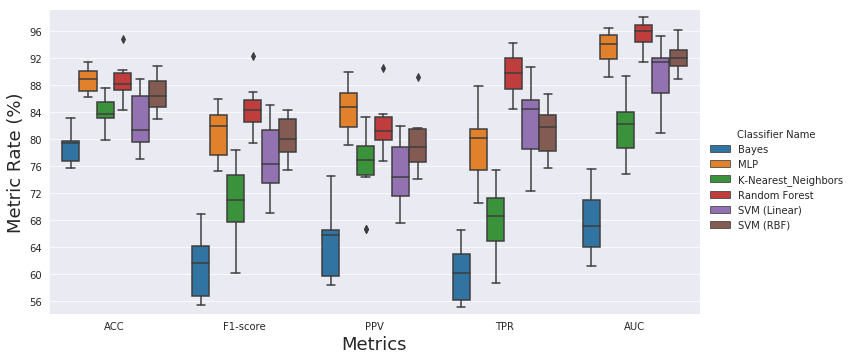

In [33]:
# Plot
g = sns.catplot(x="metric",
                y="vals",
                hue="Classifier Name",
                data=df_agg_scores,
                kind ='box',
                aspect=2)

# Adjustments to the plot properties
plt.ylabel('Metric Rate (%)', fontsize=18)
plt.xlabel('Metrics', fontsize=18)
plt.yticks(np.arange(0,100,4))
plt.ylim([df_agg_scores['vals'].min()-1,df_agg_scores['vals'].max()+1])
plt.show()

In [34]:
# Display Average Results By Classifier By Metric
df_results=df_agg_scores.groupby(['Classifier Name','metric'], as_index=False)\
                        .agg('mean')\
                        .rename(columns={'vals':'avg'})
df_results

,Classifier Name,metric,avg
0,Bayes,ACC,78.927164
1,Bayes,AUC,67.533481
2,Bayes,F1-score,61.360359
3,Bayes,PPV,64.771775
4,Bayes,TPR,60.215398
5,K-Nearest_Neighbors,ACC,83.950998
6,K-Nearest_Neighbors,AUC,82.134007
7,K-Nearest_Neighbors,F1-score,70.156189
8,K-Nearest_Neighbors,PPV,76.106594
9,K-Nearest_Neighbors,TPR,67.702222


In [35]:
# Display classifiers sorted by AUC values
df_results[df_results['metric']=='AUC'].sort_values(by=['avg'],ascending=False)

,Classifier Name,metric,avg
16,Random Forest,AUC,95.633026
11,MLP,AUC,93.618155
26,SVM (RBF),AUC,92.247495
21,SVM (Linear),AUC,89.392624
6,K-Nearest_Neighbors,AUC,82.134007
1,Bayes,AUC,67.533481




Bayes AUC: 0.7009602775075088


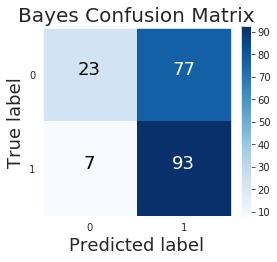

,Level 1 Incident,Level 2 Incident,id,True label
74,0.016203,0.983797,1895,1
183,0.023296,0.976704,604,1
180,0.023728,0.976272,202,1
335,0.025385,0.974615,1427,1
381,0.025879,0.974121,1120,1




MLP AUC: 0.8761791953974365


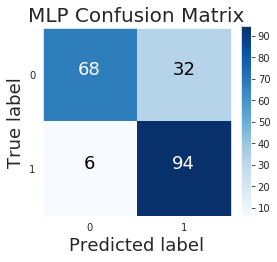

,Level 1 Incident,Level 2 Incident,id,True label
381,0.000128,0.999872,1120,1
172,0.000188,0.999812,431,1
151,0.000188,0.999812,1111,1
102,0.000217,0.999783,1418,1
167,0.000306,0.999694,1236,1




K-Nearest_Neighbors AUC: 0.7848470747493548


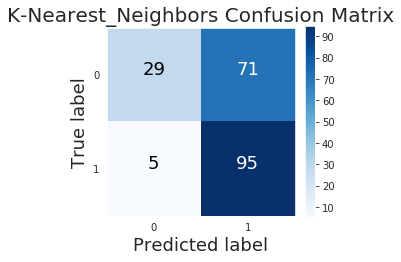

,Level 1 Incident,Level 2 Incident,id,True label
151,0.0,1.0,1111,1
183,0.0,1.0,604,1
166,0.0,1.0,1476,1
167,0.0,1.0,1236,1
168,0.0,1.0,1226,1




Random Forest AUC: 0.8410677270612125


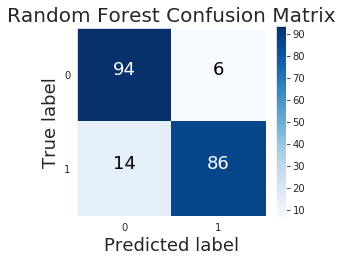

,Level 1 Incident,Level 2 Incident,id,True label
372,0.0,1.0,206,1
64,0.0,1.0,160,1
193,0.0,1.0,1727,1
76,0.0,1.0,812,1
212,0.0,1.0,986,1




SVM (Linear) AUC: 0.8555564956216422


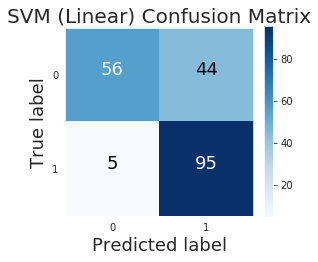

,Level 1 Incident,Level 2 Incident,id,True label
97,2.618348e-07,1.0,783,1
57,2.618348e-07,1.0,787,1
312,2.618348e-07,1.0,1054,1
261,2.618348e-07,1.0,568,1
345,2.618348e-07,1.0,1056,1




SVM (RBF) AUC: 0.8758830745801429


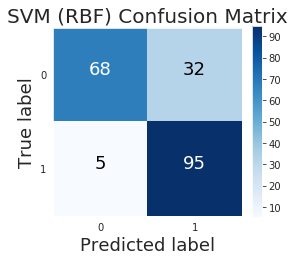

,Level 1 Incident,Level 2 Incident,id,True label
135,7.163537e-07,0.999999,1422,1
170,7.163537e-07,0.999999,1911,1
369,7.163537e-07,0.999999,1319,1
113,9.240836e-07,0.999999,710,1
112,9.301097e-07,0.999999,1213,1


In [36]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,out_path,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          fontsize=20):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = cm.astype('float')*100 / cm.sum(axis=1)[:, np.newaxis]  
    classes =  [str(int(x)) for x in np.arange(cm.shape[0])]

    plt.figure(figsize = (4,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)


    # Plot text 
    fmt = '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 fontsize=18,
                 color="white" if cm[i, j] > thresh else "black")

    # Adjustments to the plot properties
    plt.tight_layout(pad=2)
    plt.grid(False)
    plt.ylabel('True label',fontsize=fontsize-2)
    plt.xlabel('Predicted label',fontsize=fontsize-2)
    plt.title(title,fontsize=fontsize)
    plt.colorbar(fraction=0.046)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes) #, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Save figure
    plt.savefig(out_path+'.png')
    plt.savefig(out_path+'.svg')
    plt.savefig(out_path+'.eps')
    plt.show()
    return True

# Creates a folder if don't exist
if not os.path.exists('./Figs'):
    os.makedirs('./Figs')

# For each classifier Sort the TEST set based on the predited score
# Additionally plot and save the Confusion matrix of a given experiment.
for clf_name in clf_name_list:
  
  # Load Model
  filename = './Models/'+clf_name+'.pkl'  
  clf = joblib.load(filename) 
  
  #Predict on TestSet
  pred_labels = clf.predict_proba(test_features)  
  
  #Compute AUC
  y_score = [prob[idx] for prob,idx in zip(pred_labels,np.argmax(pred_labels,axis=1))]
  auc = roc_auc_score(test_labels.values, y_score) 
  
  print('\n'+'\n'+clf_name+' AUC:',auc)
  
  #Compute and Plot Confusion Matrix
  conf_mat = confusion_matrix(test_labels.values,np.argmax(pred_labels,axis=1))
  plot_confusion_matrix(conf_mat,'./Figs/'+clf_name,title=clf_name+' Confusion Matrix')
  

  #Order TestSet Based on their Predicted Scores
  df_pred_labels = pd.DataFrame(pred_labels)
  df_true_labels = pd.DataFrame(test_labels).reset_index()\
                                            .rename(columns={'index':'id'})
  df = pd.concat([df_pred_labels,df_true_labels],axis=1)
  df.columns = ['Level 1 Incident', 'Level 2 Incident','id','True label']
  df_result = df.sort_values(by=['Level 2 Incident'],ascending=False)
  
  display(df_result.head(5))

In [37]:
!ls Figs

 Bayes.eps		   MLP.eps	       'SVM (Linear).eps'
 Bayes.png		   MLP.png	       'SVM (Linear).png'
 Bayes.svg		   MLP.svg	       'SVM (Linear).svg'
 K-Nearest_Neighbors.eps  'Random Forest.eps'  'SVM (RBF).eps'
 K-Nearest_Neighbors.png  'Random Forest.png'  'SVM (RBF).png'
 K-Nearest_Neighbors.svg  'Random Forest.svg'  'SVM (RBF).svg'


  **Baseado nos experimentos realizados, pode-se concluir que, com resultados estatisticamente equivalentes, os classificador MLP e SVM com kernel RBF  obtiveram os melhores resultados no problema em questão (AUC > 0.87%).**

  **Apesar do classificador Random Forest obter um resultado superior de AUC no processo de Treinamento, este comportamento se mostrou como uma sobre-especialização do mesmo ao conjunto de treino, tendo em vista que seus resultados no conjunto de teste foram superados por SVM e MLP.**  

  **Além disso, o desempenho dos classificadores Multinomial Bayes e KNN se motraram inferiores aos demais, sendo o Bayes o mais limitado dentre os classificadores explorados. **